In [1]:
import pandas as pd 

df= pd.read_csv('card_transdata.csv')
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [2]:
df.shape

(1000000, 8)

In [3]:
import seaborn as sns


<AxesSubplot:>

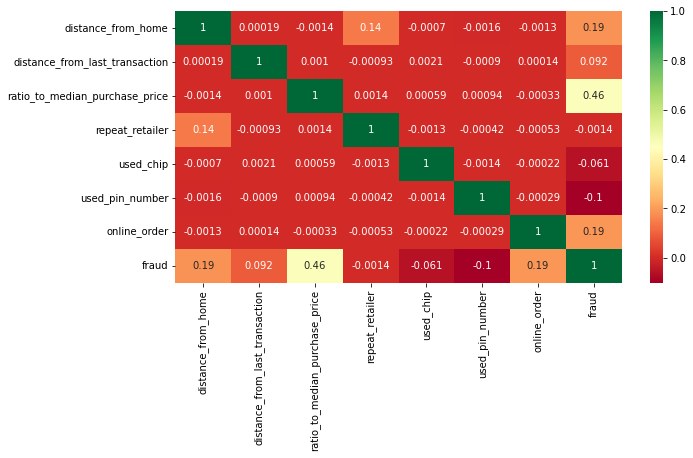

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap= 'RdYlGn')

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#scaling the data 
MMsc= MinMaxScaler()
X= df.iloc[:, :-1]
y= df.iloc[:,-1]

feature_names= df.columns.tolist()
feature_names.remove('fraud')

X= MMsc.fit_transform(X[feature_names])

print('features minimum value: {:.3f}'.format(X.min()))
print('features maximum Value: {:.3f}'.format(X.max()))


features minimum value: 0.000
features maximum Value: 1.000


In [7]:
num_fraud= len(df[df['fraud']==1])
num_nonfraud= len(df[df['fraud']==0])
n= df.shape[0]
print('Percentage of Fraudulent acts: {:.3f}'.format((num_fraud/n)*100))
print('Percentage of Non Fraudulent acts: {:.3f}'.format((num_nonfraud/n)*100))

Percentage of Fraudulent acts: 8.740
Percentage of Non Fraudulent acts: 91.260


In [8]:
print('number of frauds without use of pin: {:.3f}'.format(df.loc[(df.fraud==1) & (df.used_pin_number==0)].shape[0]/df.loc[(df.fraud==1)].shape[0]))

print('number of frauds without use of chip: {:.3f}'.format(df.loc[(df.fraud==1) & (df.used_chip==0)].shape[0]/df.loc[(df.fraud==1)].shape[0]))

print('number of frauds in online order: {:.3f}'.format(df.loc[(df.fraud==1) & (df.online_order==1)].shape[0]/df.loc[(df.fraud==1)].shape[0]))

number of frauds without use of pin: 0.997
number of frauds without use of chip: 0.744
number of frauds in online order: 0.946


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
model= RandomForestClassifier(n_estimators=50, max_depth= 12, random_state=0)
model.fit(X_train,y_train)
 

RandomForestClassifier(max_depth=12, n_estimators=50, random_state=0)

In [10]:
prediction= model.predict(X_test)

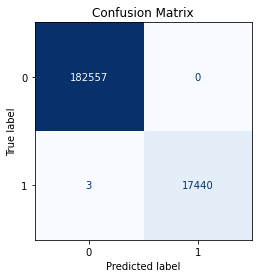

In [11]:
cm= confusion_matrix(y_true=y_test, y_pred=prediction)
ConfusionMatrixDisplay(cm).plot(cmap='Blues', colorbar= False)
plt.title('Confusion Matrix')
plt.show()

In [12]:
report = pd.DataFrame(data=classification_report(
    y_true=y_test, y_pred=prediction, output_dict=True))
report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.999984,1.000000,0.999985,0.999992,0.999985
recall,1.000000,0.999828,0.999985,0.999914,0.999985
f1-score,0.999992,0.999914,0.999985,0.999953,0.999985
support,182557.000000,17443.000000,0.999985,200000.000000,200000.000000


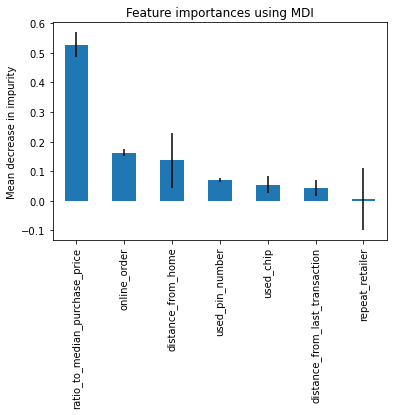

Mean features importance
ratio_to_median_purchase_price: 0.527330596092319
online_order: 0.16220222235680545
distance_from_home: 0.13647291030283035
used_pin_number: 0.06975859943522901
used_chip: 0.05469441625468217
distance_from_last_transaction: 0.04390223247336731
repeat_retailer: 0.005639023084766659


In [13]:
#Feature importances
X_train= pd.DataFrame(X_train, columns=feature_names)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
rfc_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
rfc_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI") #Minimum decrease in impurity
ax.set_ylabel("Mean decrease in impurity")
plt.show()

print('Mean features importance')
for feature in rfc_importances.index:
    print(feature+': '+str(rfc_importances[feature]))

In [14]:
# from sklearn import tree
# import graphviz

# base_tree = model.base_estimator_
# base_tree.fit(X_train,y_train)

# dot_data = tree.export_graphviz(base_tree, out_file=None)
# graph = graphviz.Source(dot_data) 
# graph.render("card fraud")

# dot_data = tree.export_graphviz(base_tree, out_file=None, 
#                                 feature_names=X_train.columns,  
#                                 class_names=y_train.name,  
#                                 filled=True, rounded=True,  
#                                 special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

In [15]:
import joblib

joblib.dump(model, 'detectorModel.joblib')
joblib.dump(MMsc, 'scaler.joblib')

['scaler.joblib']